# LAB 4 - Naive Bayes Classifier 

Demonstrate Naive Bayes Classifier. Code should implement the following on suitable dataset of your choice with more than 100 samples.
1. Naive Bayes Classifier for numeric data
2. Naive Bayes Classifier for nominal data
3. Confusion matrix and Accuracy as evaluation metric

## What is a classifier?
A classifier is a machine learning model that is used to discriminate different objects based on certain features.


Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. 

## What is Naive Bayes algorithm?

One of the supervised machine learning algorithm “Naive Bayes” mainly used for classification. It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.  For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that this fruit is an apple and that is why it is known as ‘Naive’.  
Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.



### Principle of Naive Bayes Classifier:

A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task. It works on Bayes theorem of probability to predict the class of unknown data sets. The crux of the classifier is based on the Bayes theorem.

### Bayes Theorem:

<img src="https://miro.medium.com/max/638/1*tjcmj9cDQ-rHXAtxCu5bRQ.png">


Using Bayes theorem, we can find the probability of A happening, given that B has occurred. Here, B is the evidence and A is the hypothesis. The assumption made here is that the predictors/features are independent. That is presence of one particular feature does not affect the other. Hence it is called naive.


To understand this we need to know first Conditional probability. please refer to ther <a href="http://www.cs.uni.edu/~campbell/stat/prob4.html">Conditional probability and the product rule</a>

https://www.kaggle.com/qizarafzaal/adult-dataset/code

In [98]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

# Dataset
The `Adult dataset` is from the Census Bureau and the `task is to predict whether a given adult makes more than $50,000 a year based` attributes such as education, hours of work per week, etc. The dataset provides 14 input variables that are a mixture of categorical, ordinal, and numerical data types. The complete list of variables is as follows:

- Age
- Workclass
- Final Weight
- Education
- Education Number of Years
- Marital-status
- Occupation
- Relationship
- Race
- Sex
- Capital-gain
- Capital-loss
- Hours-per-week
- Native-country

In [99]:
df = pd.read_csv("adult.csv", header=None, sep=',\s' )

In [100]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


https://machinelearningmastery.com/imbalanced-classification-with-the-adult-income-dataset/

Let's put the column name to better understand our dataset. 

In [101]:
df.columns = [ "Age",'Workclass','Final_Weight', 'Education', 'Education_Number_of_Years', 'Marital-status' ,'Occupation',
              'Relationship','Race','Sex','Capital_gain','Capital_loss','Hours_per_week', 'Native_country','Income']

Let's again preview the dataset

In [102]:
df.head()

,Age,Workclass,Final_Weight,Education,Education_Number_of_Years,Marital-status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


We can see that the column names are renamed. Now, the columns have meaningful names.

In [103]:
df.columns

Index(['Age', 'Workclass', 'Final_Weight', 'Education',
       'Education_Number_of_Years', 'Marital-status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss',
       'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

## Exploratory data analysis

In [104]:
df.shape

(32561, 15)

Let's view the sumarry of the dataset.

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        32561 non-null  int64 
 1   Workclass                  32561 non-null  object
 2   Final_Weight               32561 non-null  int64 
 3   Education                  32561 non-null  object
 4   Education_Number_of_Years  32561 non-null  int64 
 5   Marital-status             32561 non-null  object
 6   Occupation                 32561 non-null  object
 7   Relationship               32561 non-null  object
 8   Race                       32561 non-null  object
 9   Sex                        32561 non-null  object
 10  Capital_gain               32561 non-null  int64 
 11  Capital_loss               32561 non-null  int64 
 12  Hours_per_week             32561 non-null  int64 
 13  Native_country             32561 non-null  object
 14  Income

let's check for missing values.

In [106]:
df.isnull().sum()

Age                          0
Workclass                    0
Final_Weight                 0
Education                    0
Education_Number_of_Years    0
Marital-status               0
Occupation                   0
Relationship                 0
Race                         0
Sex                          0
Capital_gain                 0
Capital_loss                 0
Hours_per_week               0
Native_country               0
Income                       0
dtype: int64

We can see that we don't have any missing values in our dataset.

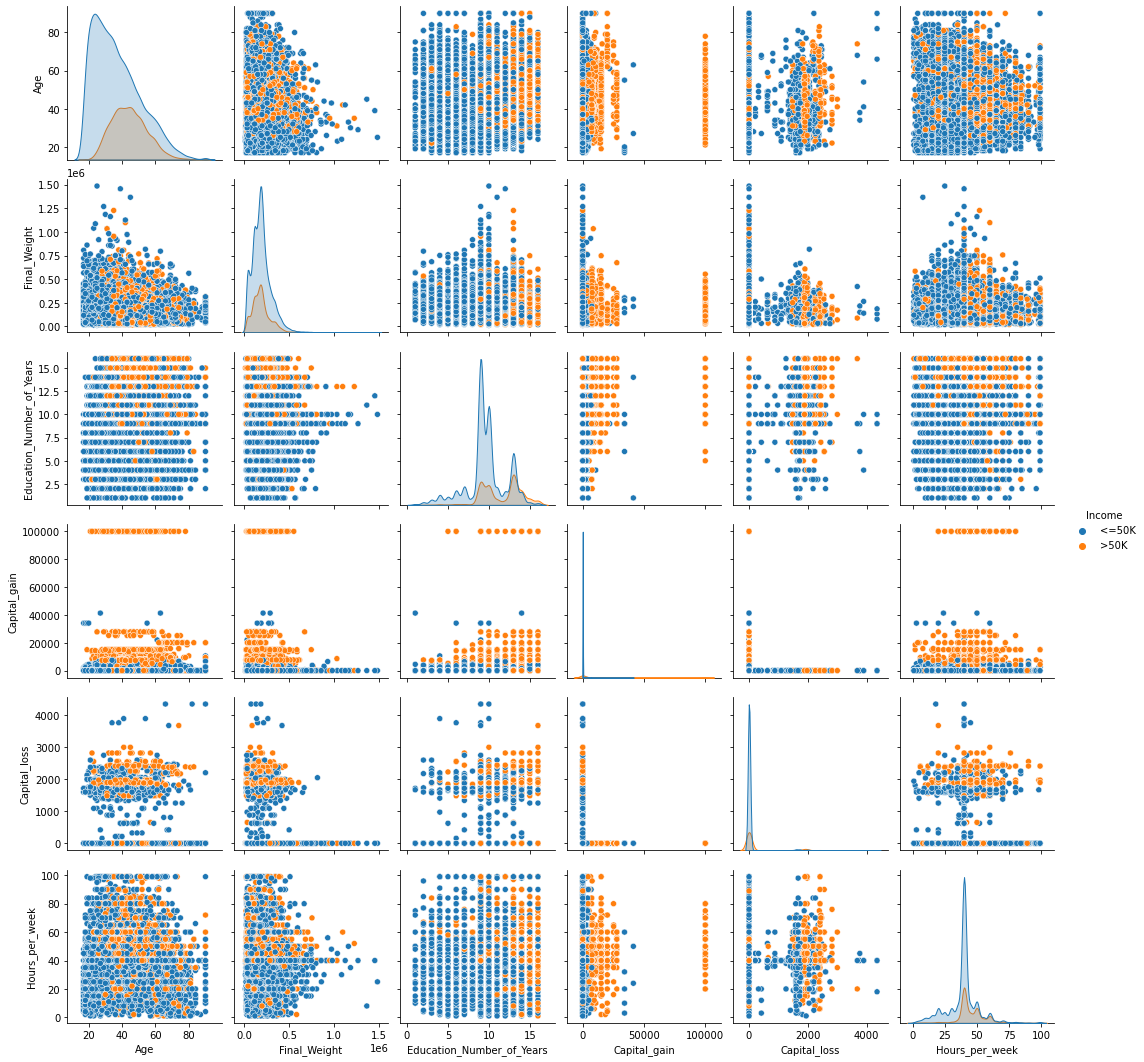

In [107]:
sns.pairplot(df,hue='Income')

## Types of variables

In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type int64.

Let's first explore categorical variables.

# categorical variables



In [108]:
categorical = [var for var in df.columns if df[var].dtype=='O']

Let's view the categorical variables.

In [109]:
df_cat = df[categorical].head()

In [110]:
df_cat

,Workclass,Education,Marital-status,Occupation,Relationship,Race,Sex,Native_country,Income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [111]:
df_cat.columns

Index(['Workclass', 'Education', 'Marital-status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

so we have 9 categorical variable and the `Income` is catagorical variable.

## Frequency counts of categorical variables

In [112]:
for var in categorical:
    print(df[var].value_counts())
    print('\n')

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64


HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: Education, dtype: int64


Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: Marital-status, dtype: int64


Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical      

In [113]:
np.float(len(df))

32561.0

## view frequency distribution of categorical variables

In [114]:
for var in categorical:
    print(df[var].value_counts()/np.float(len(df)),'\n')

Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: Workclass, dtype: float64 

HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: Education, dtype: float64 

Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: Marital-status, dtype: floa

Now, we can see that there are several variables like workclass, occupation and native_country which contain missing values. Generally, the missing values are coded as `NaN` and python will detect them with the usual command of `df.isnull().sum().`

But, in this case the missing values are coded as `?`. Python fail to detect these as missing values because it do not consider `?` as missing values. So, I have to replace `?` with `NaN` so that Python can detect these missing values.

In [115]:
df.Workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

let's check the frequency of each.

In [18]:
df.Workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

We can see that there are `1836` values encoded as `?` in workclass variable. I will replace these `? with NaN.`

In [116]:
df['Workclass'].replace('?',np.NaN,inplace=True)

In [117]:
df.Workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

Now, we can see that there are no values encoded as `?` in the workclass variable.

I will adopt similar approach with `occupation` and `native_country` column.

In [118]:
df['Occupation'].replace('?',np.NaN,inplace=True)

In [119]:
df['Native_country'].replace('?',np.NaN,inplace=True)

### Check missing values in categorical variables again

In [120]:
df[categorical].isnull().sum()

Workclass         1836
Education            0
Marital-status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Native_country     583
Income               0
dtype: int64

## Number of labels: cardinality
The number of labels within a categorical variable is known as `cardinality`. A high number of labels within a variable is known as `high cardinality.` High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [121]:
for var in categorical:
    print(var, 'contains', len(df[var].unique()),'lables.')

Workclass contains 9 lables.
Education contains 16 lables.
Marital-status contains 7 lables.
Occupation contains 15 lables.
Relationship contains 6 lables.
Race contains 5 lables.
Sex contains 2 lables.
Native_country contains 42 lables.
Income contains 2 lables.


We can see that `native_country` column contains relatively large number of labels as compared to other columns. I will check for cardinality after train-test split.

## Explore Numerical Variables


In [122]:
numerical = [var for var in df.columns if df[var].dtype != 'O']

In [123]:
numerical

['Age',
 'Final_Weight',
 'Education_Number_of_Years',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

In [124]:
df_num = df[numerical].head()

In [125]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        5 non-null      int64
 1   Final_Weight               5 non-null      int64
 2   Education_Number_of_Years  5 non-null      int64
 3   Capital_gain               5 non-null      int64
 4   Capital_loss               5 non-null      int64
 5   Hours_per_week             5 non-null      int64
dtypes: int64(6)
memory usage: 368.0 bytes


- There are 6 numerical variables.
- These are given by age, fnlwgt, education_num, capital_gain, capital_loss and hours_per_week.
- All of the numerical variables are of discrete data type.

Let's check for the missing value. 

In [126]:
df[numerical].isnull().sum()

Age                          0
Final_Weight                 0
Education_Number_of_Years    0
Capital_gain                 0
Capital_loss                 0
Hours_per_week               0
dtype: int64

We can see that all the 6 numerical variables do not contain missing values.

In [128]:
df_num.head()

,Age,Final_Weight,Education_Number_of_Years,Capital_gain,Capital_loss,Hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


## Declare feature vector and target variable


In [129]:
X = df.drop(['Income'],axis=1)
y = df['Income']

In [130]:
x1 = df[['Age','Final_Weight',	'Education_Number_of_Years','Capital_gain',	'Capital_loss','Hours_per_week']]
y1 = df['Income']

x2 = df[categorical]
x2 = x2.drop(['Income'],axis=1)
y2 = df['Income']

In [131]:
x1.head()

,Age,Final_Weight,Education_Number_of_Years,Capital_gain,Capital_loss,Hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [132]:
x2.head()

,Workclass,Education,Marital-status,Occupation,Relationship,Race,Sex,Native_country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [133]:
y1.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: Income, dtype: object

## Split data into separate training and test set 

This is for both the numerica and categorical data. 

In [134]:
from sklearn.model_selection import train_test_split

In [137]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((22792, 14), (9769, 14))

## Feature Engineering
Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

Let's display catagorical and numerical variable separately.

In [138]:
X_train.dtypes

Age                           int64
Workclass                    object
Final_Weight                  int64
Education                    object
Education_Number_of_Years     int64
Marital-status               object
Occupation                   object
Relationship                 object
Race                         object
Sex                          object
Capital_gain                  int64
Capital_loss                  int64
Hours_per_week                int64
Native_country               object
dtype: object

Let's check the categorical of `X_train`

In [139]:
categorical = [col for col in X_train.columns if X_train[col].dtype == 'O']
categorical

['Workclass',
 'Education',
 'Marital-status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country']

Let's check numerical data of `X_train`

In [140]:
numerical = [col for col in X_train.columns if X_train[col].dtype != 'O']
numerical

['Age',
 'Final_Weight',
 'Education_Number_of_Years',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

## Engineering missing values in categorical variables

In [141]:
X_train[categorical].isnull().mean()


Workclass         0.055985
Education         0.000000
Marital-status    0.000000
Occupation        0.056072
Relationship      0.000000
Race              0.000000
Sex               0.000000
Native_country    0.018164
dtype: float64

In [142]:
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col,X_train[col].isnull().mean())

Workclass 0.055984555984555984
Occupation 0.05607230607230607
Native_country 0.018164268164268166


### impute missing categorical variables with most frequent value


In [143]:
for df2 in [X_train,X_test]:
    df2['Workclass'].fillna(X_train['Workclass'].mode()[0],inplace=True)
    df2['Occupation'].fillna(X_train['Occupation'].mode()[0],inplace=True)
    df2['Native_country'].fillna(X_train['Native_country'].mode()[0],inplace=True)

In [144]:
X_train['Workclass'].mode()[0]

'Private'

# check missing values in categorical variables in X_train

In [145]:
X_train[categorical].isnull().mean()

Workclass         0.0
Education         0.0
Marital-status    0.0
Occupation        0.0
Relationship      0.0
Race              0.0
Sex               0.0
Native_country    0.0
dtype: float64

### check missing values in categorical variables in X_test

In [146]:
X_test[categorical].isnull().mean()

Workclass         0.0
Education         0.0
Marital-status    0.0
Occupation        0.0
Relationship      0.0
Race              0.0
Sex               0.0
Native_country    0.0
dtype: float64

As final check let's check missing values in X_train and X_test.

In [147]:
X_train.isnull().sum()

Age                          0
Workclass                    0
Final_Weight                 0
Education                    0
Education_Number_of_Years    0
Marital-status               0
Occupation                   0
Relationship                 0
Race                         0
Sex                          0
Capital_gain                 0
Capital_loss                 0
Hours_per_week               0
Native_country               0
dtype: int64

In [148]:
# for the test data 
X_test.isnull().sum()

Age                          0
Workclass                    0
Final_Weight                 0
Education                    0
Education_Number_of_Years    0
Marital-status               0
Occupation                   0
Relationship                 0
Race                         0
Sex                          0
Capital_gain                 0
Capital_loss                 0
Hours_per_week               0
Native_country               0
dtype: int64

We can see that there are no missing values in X_train and X_test.

## Encode categorical variables

In [81]:
X_train[categorical].head()

,Workclass,Education,Marital-status,Occupation,Relationship,Race,Sex,Native_country
32098,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25206,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
12367,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,Guatemala
7054,Private,7th-8th,Never-married,Craft-repair,Not-in-family,White,Male,Germany


In [150]:
# import category encoders
import category_encoders as ce

## One Hot Encoding

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. So, you're playing with ML models and you encounter this “One hot encoding” term all over the place.


<img src = "https://miro.medium.com/max/1200/0*T5jaa2othYfXZX9W.">

Example of One hot encoding 

<img src="https://i.imgur.com/mtimFxh.png">

In [154]:
categorical

['Workclass',
 'Education',
 'Marital-status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country']

In [155]:
encoder = ce.OneHotEncoder(cols=['Workclass','Education','Marital-status','Occupation','Relationship','Race','Sex','Native_country'])

In [156]:
encoder

OneHotEncoder(cols=['Workclass', 'Education', 'Marital-status', 'Occupation',
                    'Relationship', 'Race', 'Sex', 'Native_country'])

In [157]:
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [158]:
X_train

,Age,Workclass_1,Workclass_2,Workclass_3,Workclass_4,Workclass_5,Workclass_6,Workclass_7,Workclass_8,Final_Weight,...,Native_country_32,Native_country_33,Native_country_34,Native_country_35,Native_country_36,Native_country_37,Native_country_38,Native_country_39,Native_country_40,Native_country_41
32098,45,1,0,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,0,0
25206,47,0,1,0,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,0
23491,48,1,0,0,0,0,0,0,0,187505,...,0,0,0,0,0,0,0,0,0,0
12367,29,1,0,0,0,0,0,0,0,145592,...,0,0,0,0,0,0,0,0,0,0
7054,23,1,0,0,0,0,0,0,0,203003,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,43,0,0,0,0,0,1,0,0,33331,...,0,0,0,0,0,0,0,0,0,0
19648,44,1,0,0,0,0,0,0,0,98466,...,0,0,0,0,0,0,0,0,0,0
9845,23,1,0,0,0,0,0,0,0,45317,...,0,0,0,0,0,0,0,0,0,0
10799,45,0,0,0,0,0,1,0,0,215862,...,0,0,0,0,0,0,0,0,0,0


Le'ts take a loock at the X_test columns.

In [159]:
X_test

,Age,Workclass_1,Workclass_2,Workclass_3,Workclass_4,Workclass_5,Workclass_6,Workclass_7,Workclass_8,Final_Weight,...,Native_country_32,Native_country_33,Native_country_34,Native_country_35,Native_country_36,Native_country_37,Native_country_38,Native_country_39,Native_country_40,Native_country_41
22278,27,1,0,0,0,0,0,0,0,177119,...,0,0,0,0,0,0,0,0,0,0
8950,27,1,0,0,0,0,0,0,0,216481,...,0,0,0,0,0,0,0,0,0,0
7838,25,1,0,0,0,0,0,0,0,256263,...,0,0,0,0,0,0,0,0,0,0
16505,46,1,0,0,0,0,0,0,0,147640,...,0,0,0,0,0,0,0,0,0,0
19140,45,1,0,0,0,0,0,0,0,172822,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21949,46,1,0,0,0,0,0,0,0,192963,...,0,0,0,0,0,0,0,0,0,0
26405,64,0,0,0,1,0,0,0,0,388594,...,0,0,0,0,0,0,0,0,0,0
23236,54,0,0,0,0,1,0,0,0,304570,...,0,0,0,0,0,0,0,0,0,0
26823,36,0,0,1,0,0,0,0,0,90159,...,0,0,0,0,0,0,0,0,0,0


We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called feature scaling. I will do it as follows.

## Feature Scaling 

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

In [160]:
col = X_train.columns

In [161]:
col

Index(['Age', 'Workclass_1', 'Workclass_2', 'Workclass_3', 'Workclass_4',
       'Workclass_5', 'Workclass_6', 'Workclass_7', 'Workclass_8',
       'Final_Weight',
       ...
       'Native_country_32', 'Native_country_33', 'Native_country_34',
       'Native_country_35', 'Native_country_36', 'Native_country_37',
       'Native_country_38', 'Native_country_39', 'Native_country_40',
       'Native_country_41'],
      dtype='object', length=105)

In [166]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [163]:
X_train

array([[ 0.4 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.5 , -1.  ,  1.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.55,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [-0.7 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.4 , -1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.6 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [165]:
X_test

array([[-0.47619048,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.47619048,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.57142857,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.80952381, -1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.04761905, -1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.71428571,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [167]:
X_train = pd.DataFrame(X_train, columns=[col])

In [168]:
X_test = pd.DataFrame(X_test, columns=[col])

In [169]:
X_train.head()

,Age,Workclass_1,Workclass_2,Workclass_3,Workclass_4,Workclass_5,Workclass_6,Workclass_7,Workclass_8,Final_Weight,...,Native_country_32,Native_country_33,Native_country_34,Native_country_35,Native_country_36,Native_country_37,Native_country_38,Native_country_39,Native_country_40,Native_country_41
0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.058906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.50,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.578076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.270650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We now have X_train dataset ready to be fed into the Gaussian Naive Bayes classifier.

## Model training

In [170]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model 
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

## Predict the results

In [171]:
y_pred = gnb.predict(X_test)

In [172]:
y_pred

array(['<=50K', '<=50K', '>50K', ..., '>50K', '<=50K', '<=50K'],
      dtype='<U5')

## Check accuracy score

In [173]:
from sklearn.metrics import accuracy_score

In [174]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8060


Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.

## Compare the train-set and test-set accuracy

Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [175]:
y_pred_train = gnb.predict(X_train)
y_pred_train

array(['>50K', '<=50K', '>50K', ..., '<=50K', '>50K', '<=50K'],
      dtype='<U5')

In [176]:
print("Training-set accuracy score: {0:0.4f}".format(accuracy_score(y_train,y_pred_train)))

Training-set accuracy score: 0.8067


## Check for overfitting and underfitting

In [177]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8067
Test set score: 0.8060


The training-set accuracy score is 0.8067 while the test-set accuracy to be 0.8083. These two values are quite comparable. So, there is no sign of overfitting.

### Compare model accuracy with null accuracy
So, the model accuracy is 0.8083. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [178]:
y_test.value_counts()

<=50K    7407
>50K     2362
Name: Income, dtype: int64

We can see that the occurences of most frequent class is 7407. So, we can calculate null accuracy by dividing 7407 by total number of occurences.

In [179]:
# check null accuracy score

null_accuracy = (7407/(7407+2362))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


We can see that our model accuracy score is 0.8083 but null accuracy score is 0.7582. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called `Confusion matrix` that comes to our rescue.

## Confusion matrix 

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

- `True Positives (TP)` – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

- `True Negatives (TN)` – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

- `False Positives (FP)` – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called `Type I error.`

- `False Negatives (FN)` – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called `Type II error`.

These four outcomes are summarized in a confusion matrix given below.


In [180]:
from sklearn.metrics import confusion_matrix

In [181]:
cm = confusion_matrix(y_test,y_pred)

In [182]:
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[5978 1429]
 [ 466 1896]]


In [185]:
print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


True Positives(TP) =  5978

True Negatives(TN) =  1896

False Positives(FP) =  1429

False Negatives(FN) =  466


The confusion matrix shows `5978 + 1896 = 7874 correct predictions` and `1429 + 466 = 1895 incorrect predictions`.

In this case, we have

- True Positives (Actual Positive:1 and Predict Positive:1) - 5978
- True Negatives (Actual Negative:0 and Predict Negative:0) - 1896
- False Positives (Actual Negative:0 but Predict Positive:1) - 1429 (Type I error)
- False Negatives (Actual Positive:1 but Predict Negative:0) - 466 (Type II error)

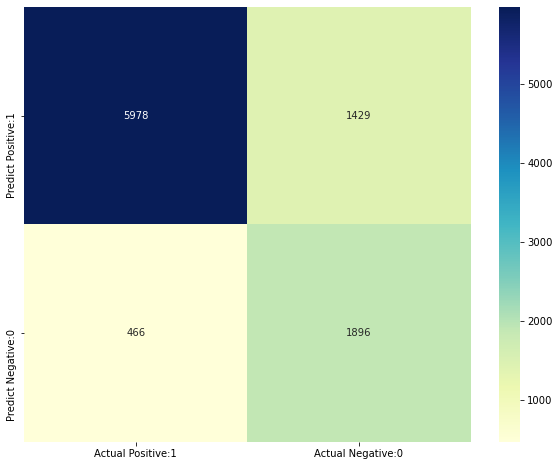

In [186]:
# visualize confusion matrix with seaborn heatmap

plt.figure(figsize=(10,8))
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

## Results and conclusion

1. In this project, I build a Gaussian Naïve Bayes Classifier model to predict whether a person makes over 50K a year. The model yields a very good performance as indicated by the model accuracy which was found to be 0.8083.


2. The training-set accuracy score is 0.8067 while the test-set accuracy to be 0.8083. These two values are quite comparable. So, there is no sign of overfitting.


3. I have compared the model accuracy score which is 0.8083 with null accuracy score which is 0.7582. So, we can conclude that our Gaussian Naïve Bayes classifier model is doing a very good job in predicting the class labels.